# **LOAN APPROVAL PREDICTION PROJECT**

Project Overview

Project Objective

# **Exploratory Data Analysis**

In [ ]:
# importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score


from xgboost import XGBClassifier
from xgboost import plot_importance

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix


import warnings
warnings.filterwarnings("ignore")

In [ ]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import dataset
df = pd.read_csv('/content/drive/MyDrive/IIP Africa/Capstone Project/loan_approval_dataset.csv')

In [ ]:
# view first few rows of the dataset
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [ ]:
# shape
df.shape

(4269, 13)

In [ ]:
# dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [ ]:
# summary of the dataset
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


array([[<Axes: title={'center': 'loan_id'}>,
        <Axes: title={'center': ' no_of_dependents'}>,
        <Axes: title={'center': ' income_annum'}>],
       [<Axes: title={'center': ' loan_amount'}>,
        <Axes: title={'center': ' loan_term'}>,
        <Axes: title={'center': ' cibil_score'}>],
       [<Axes: title={'center': ' residential_assets_value'}>,
        <Axes: title={'center': ' commercial_assets_value'}>,
        <Axes: title={'center': ' luxury_assets_value'}>],
       [<Axes: title={'center': ' bank_asset_value'}>, <Axes: >,
        <Axes: >]], dtype=object)

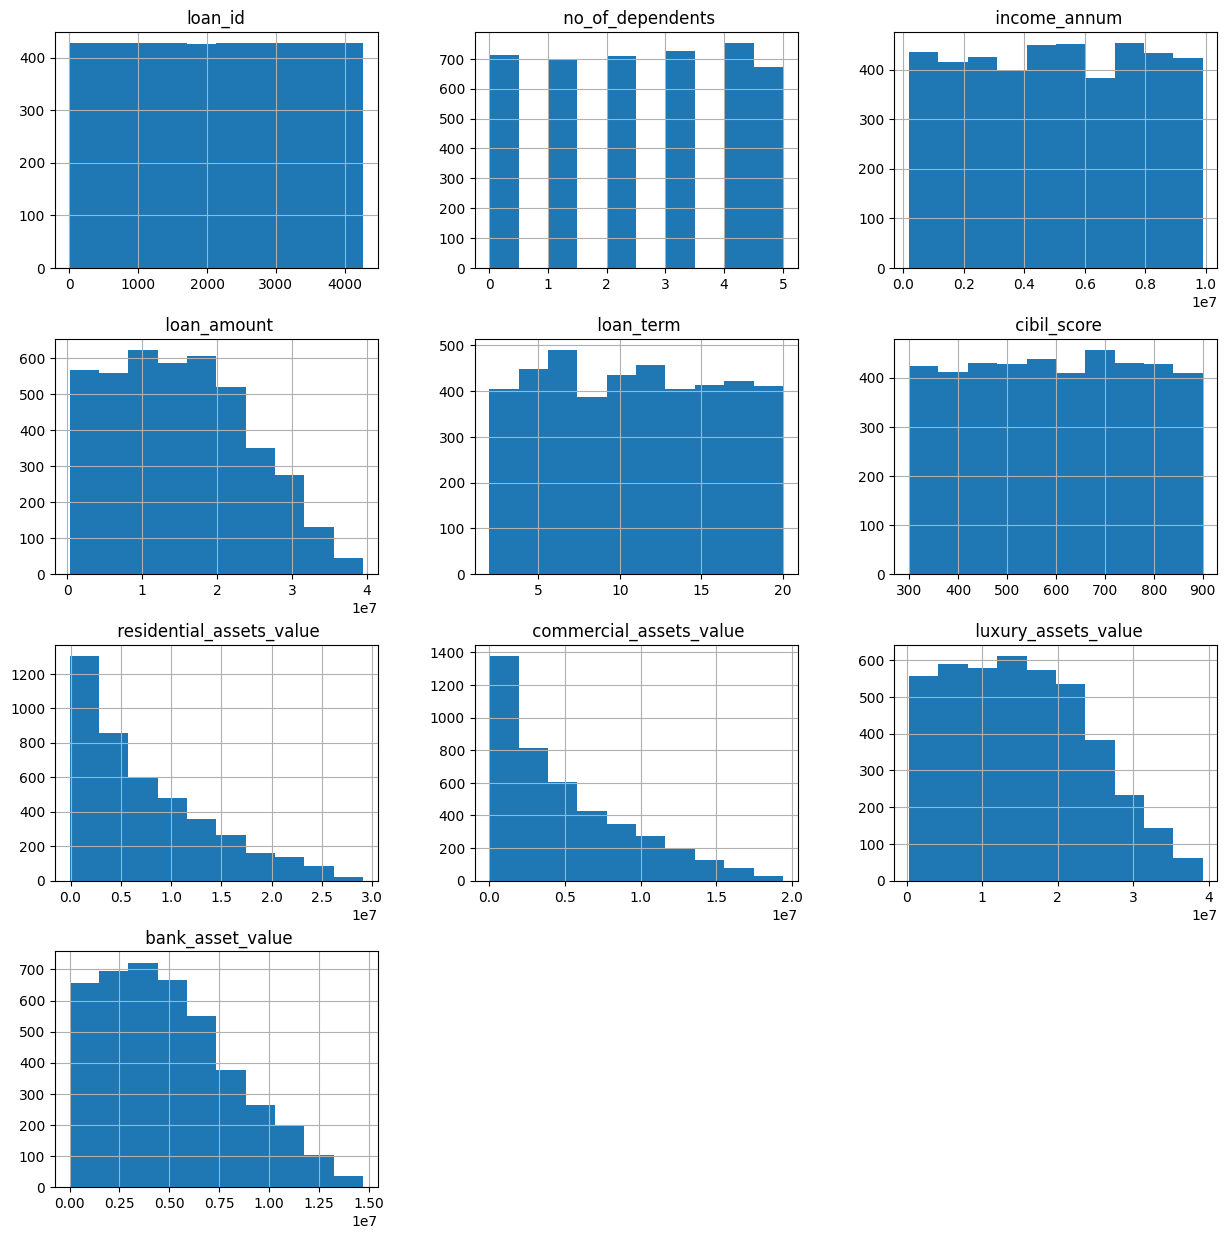

In [ ]:
# plot histograms for the variables
df.hist(figsize=(15,15))

# **Data Cleaning**

In [ ]:
# check for missing values
df.isnull().sum()

,0
loan_id,0
no_of_dependents,0
education,0
self_employed,0
income_annum,0
loan_amount,0
loan_term,0
cibil_score,0
residential_assets_value,0
commercial_assets_value,0


In [ ]:
# check for duplicates
df.duplicated().sum()

0

In [ ]:
# rename the ' loan_status' variable to 'loan_status'
df.rename(columns = {' loan_status':'loan_status'}, inplace = True)

# **Data Preprocessing**

In [ ]:
# label encoding
categorical_variables = df.select_dtypes(include='object').columns.tolist()
# categorical_variables

# define label encoder
le = LabelEncoder()

# encode categorical variables
for variable in categorical_variables:
  df[variable] = le.fit_transform(df[variable])


In [ ]:
# check if the label encoder has worked
df.head(5)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,2,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,4,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


In [ ]:
#check for the loan status variable
# df[' loan_status'].unique()

# **Model Construction**

In [ ]:
# let's start with defining the features and targets
X = df.drop(columns = ['loan_id', 'loan_status'])
y = df['loan_status']

In [ ]:
# let's now split the data into test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
# let's now try to show the dimension of the datasets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3415, 11)
(854, 11)
(3415,)
(854,)


In [ ]:
# let's start with the Logistic model as our base model
# basemodel: logistic regression model
# let's instantiate the model
log_model = LogisticRegression()

# fit the model
log_model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# predict on the test set
y_pred = log_model.predict(X_test)

In [ ]:
# let's now evaluate the model using all the important metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

# print the results
print(f"\n{'-' * 50}")
print(f"Accuracy: {accuracy} \n\n{'-' * 50}")
print(f"Precision: {precision} \n\n{'-' * 50}")
print(f"Recall: {recall} \n\n{'-' * 50}")
print(f"F1 Score: {f1} \n\n{'-' * 50}")
print(f"Recall: {recall} \n\n{'-' * 50}")
print(f"Confusion Matrix: \n{confusion_mat} \n\n{'-' * 76}")
print(f"Classification Report: {classification_rep} \n{'-' * 76}")



--------------------------------------------------
Accuracy: 0.6288056206088993 

--------------------------------------------------
Precision: 0.6666666666666666 

--------------------------------------------------
Recall: 0.006289308176100629 

--------------------------------------------------
F1 Score: 0.012461059190031154 

--------------------------------------------------
Recall: 0.006289308176100629 

--------------------------------------------------
Confusion Matrix: 
[[535   1]
 [316   2]] 

----------------------------------------------------------------------------
Classification Report:               precision    recall  f1-score   support

           0       0.63      1.00      0.77       536
           1       0.67      0.01      0.01       318

    accuracy                           0.63       854
   macro avg       0.65      0.50      0.39       854
weighted avg       0.64      0.63      0.49       854
 
---------------------------------------------------------------

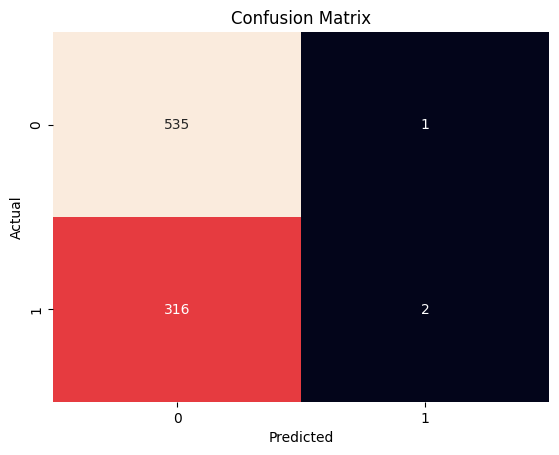

In [ ]:
# let's now plot the confusion matrix
sns.heatmap(confusion_mat, annot=True, fmt='g', cbar = False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# **Comparison Models**

**Decision Tree Model**

In [ ]:
# let's start with the decision tree model
# instantiate the model
dt_model = DecisionTreeClassifier()

# fit the model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# predict on the test set
y_pred_0 = dt_model.predict(X_test)

In [ ]:
# let's now evaluate the model using all the important metrics
accuracy_0 = accuracy_score(y_test, y_pred_0)
precision_0 = precision_score(y_test, y_pred_0)
recall_0 = recall_score(y_test, y_pred_0)
f1_0 = f1_score(y_test, y_pred_0)
classification_rep_0 = classification_report(y_test, y_pred_0)
confusion_mat_0 = confusion_matrix(y_test, y_pred_0)

# print the results
print(f"\n{'-' * 30}")
print(f"Accuracy: {accuracy_0} \n\n{'-' * 30}")
print(f"Precision: {precision_0} \n\n{'-' * 30}")
print(f"Recall: {recall_0} \n\n{'-' * 30}")
print(f"F1 Score: {f1_0} \n\n{'-' * 30}")
print(f"Confusion Matrix: \n{confusion_mat_0} \n\n{'-' * 76}")
print(f"Classification Report: {classification_rep_0} \n{'-' * 76}")



------------------------------
Accuracy: 0.9754098360655737 

------------------------------
Precision: 0.9684542586750788 

------------------------------
Recall: 0.9654088050314465 

------------------------------
F1 Score: 0.9669291338582677 

------------------------------
Confusion Matrix: 
[[526  10]
 [ 11 307]] 

----------------------------------------------------------------------------
Classification Report:               precision    recall  f1-score   support

           0       0.98      0.98      0.98       536
           1       0.97      0.97      0.97       318

    accuracy                           0.98       854
   macro avg       0.97      0.97      0.97       854
weighted avg       0.98      0.98      0.98       854
 
----------------------------------------------------------------------------


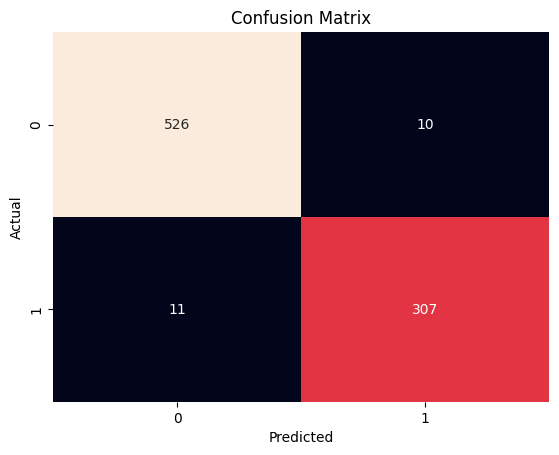

In [ ]:
# let's now plot the confusion matrix
sns.heatmap(confusion_mat_0, annot=True, fmt='g', cbar = False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**Random Forest Model**

In [ ]:
# let's try the random forest model
# instantiate the model
rf_model = RandomForestClassifier()

# fit the model
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# predict on the test data set
y_pred_1 = rf_model.predict(X_test)

In [ ]:
# let's now evaluate the model
# let's now evaluate the model using all the important metrics
accuracy_1 = accuracy_score(y_test, y_pred_1)
precision_1 = precision_score(y_test, y_pred_1)
recall_1 = recall_score(y_test, y_pred_1)
f1_1 = f1_score(y_test, y_pred_1)
classification_rep_1 = classification_report(y_test, y_pred_1)
confusion_mat_1 = confusion_matrix(y_test, y_pred_1)

# print the results
print(f"\n{'-' * 30}")
print(f"Accuracy: {accuracy_1} \n\n{'-' * 30}")
print(f"Precision: {precision_1} \n\n{'-' * 30}")
print(f"Recall: {recall_1} \n\n{'-' * 50}")
print(f"F1 Score: {f1_1} \n\n{'-' * 50}")
print(f"Confusion Matrix: \n{confusion_mat_1} \n\n{'-' * 76}")
print(f"Classification Report: {classification_rep_1} \n{'-' * 76}")


------------------------------
Accuracy: 0.977751756440281 

------------------------------
Precision: 0.9776357827476039 

------------------------------
Recall: 0.9622641509433962 

--------------------------------------------------
F1 Score: 0.9698890649762283 

--------------------------------------------------
Confusion Matrix: 
[[529   7]
 [ 12 306]] 

----------------------------------------------------------------------------
Classification Report:               precision    recall  f1-score   support

           0       0.98      0.99      0.98       536
           1       0.98      0.96      0.97       318

    accuracy                           0.98       854
   macro avg       0.98      0.97      0.98       854
weighted avg       0.98      0.98      0.98       854
 
----------------------------------------------------------------------------


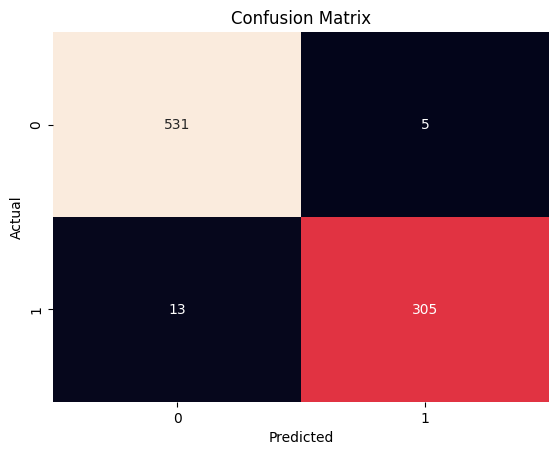

In [ ]:
# let's now plot the confusion matrix
sns.heatmap(confusion_mat_1, annot=True, fmt='g', cbar = False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**XGBClassifier Model**

In [ ]:
# let's try the XGBClassifier model
# instantiate the model
xgb_model = XGBClassifier()

# fit the model
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
# predict on the test set
y_pred = xgb_model.predict(X_test)

In [ ]:
# let's now evaluate the model using all the important metrics
accuracy1 = accuracy_score(y_test, y_pred)
precision1 = precision_score(y_test, y_pred)
recall1 = recall_score(y_test, y_pred)
f11 = f1_score(y_test, y_pred)
classification_rep1 = classification_report(y_test, y_pred)
confusion_mat1 = confusion_matrix(y_test, y_pred)

# print the results
print(f"\n{'-' * 30}")
print(f"Accuracy: {accuracy1} \n\n{'-' * 30}")
print(f"Precision: {precision1} \n\n{'-' * 30}")
print(f"Recall: {recall1} \n\n{'-' * 30}")
print(f"F1 Score: {f11} \n\n{'-' * 30}")
print(f"Confusion Matrix: \n{confusion_mat1} \n\n{'-' * 76}")
print(f"Classification Report: {classification_rep1} \n{'-' * 76}")



------------------------------
Accuracy: 0.9824355971896955 

------------------------------
Precision: 0.9809523809523809 

------------------------------
Recall: 0.9716981132075472 

------------------------------
F1 Score: 0.976303317535545 

------------------------------
Confusion Matrix: 
[[530   6]
 [  9 309]] 

----------------------------------------------------------------------------
Classification Report:               precision    recall  f1-score   support

           0       0.98      0.99      0.99       536
           1       0.98      0.97      0.98       318

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854
 
----------------------------------------------------------------------------


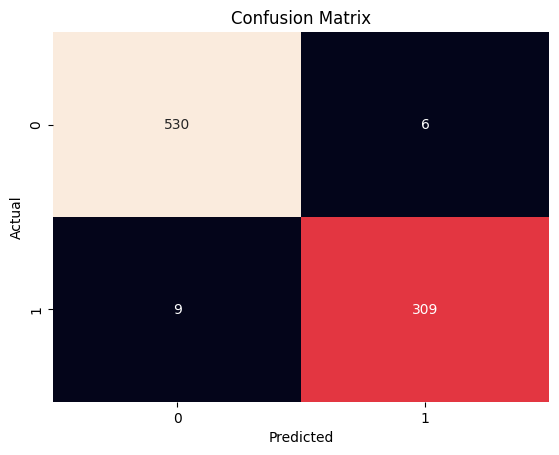

In [ ]:
# let's now plot the confusion matrix
sns.heatmap(confusion_mat1, annot=True, fmt='g', cbar = False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**Selecting the best performing model**

In [ ]:
# Create a table of results to compare model performance
table = pd.DataFrame()

table = table.append({'Model': "Logistic Regression",
                        'F1':  0.945422,
                        'Recall': 0.935863,
                        'Precision': 0.955197,
                        'Accuracy': 0.940864
                      },
                        ignore_index=True
                    )

table = table.append({'Model': "Decision Tree",
                        'F1':  0.945422,
                        'Recall': 0.935863,
                        'Precision': 0.955197,
                        'Accuracy': 0.940864
                      },
                        ignore_index=True
                    )

table = table.append({'Model': "Random Forest",
                        'F1':  0.947306,
                        'Recall': 0.944501,
                        'Precision': 0.950128,
                        'Accuracy': 0.942450
                      },
                        ignore_index=True
                    )

table = table.append({'Model': "XGBoost",
                        'F1':  f1_score,
                        'Recall': rc_score,
                        'Precision': pc_score,
                        'Accuracy': ac_score
                      },
                        ignore_index=True
                    )

table

**Visualize the Important features**

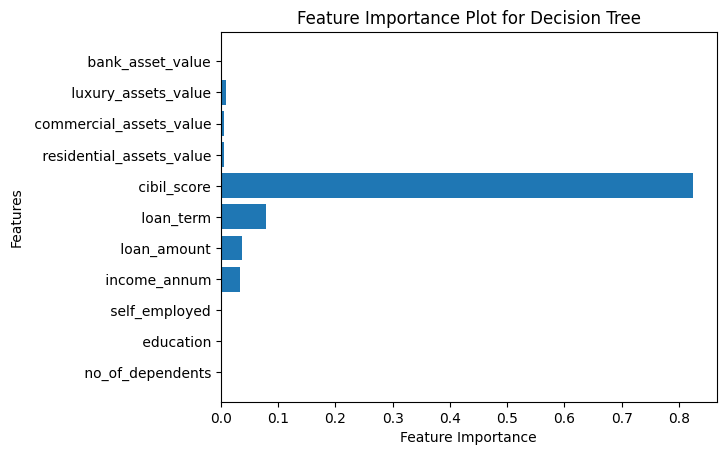

In [ ]:
# let's now see the important features
# let's plot the relative feature importance of the predictor variables in Decision Tree Classifer model
importances_0 = dt_model.feature_importances_

plt.barh(range(len(importances_0)), importances_0)
plt.yticks(range(len(importances_0)), X.columns)  # X is our feature dataframe
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Plot for Decision Tree Model')
plt.show()

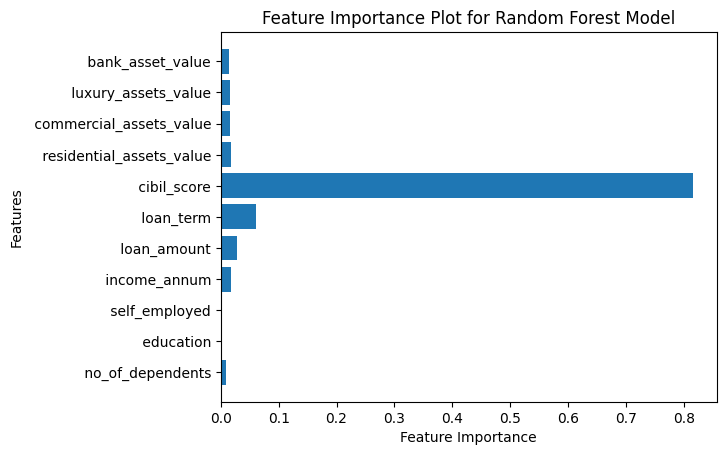

In [ ]:
# let's now see the important features
# let's plot the relative feature importance of the predictor variables in RandomForest Classifer model
importances = rf_model.feature_importances_

plt.barh(range(len(importances)), importances)
plt.yticks(range(len(importances)), X.columns)  # X is our feature dataframe
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Plot for Random Forest Model')
plt.show()

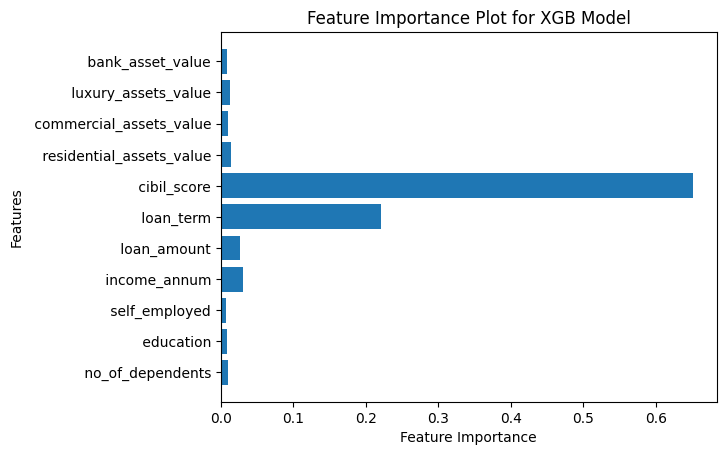

In [ ]:
# let's now see the important features
# let's plot the relative feature importance of the predictor variables in XGB Classifer model
importances_1 = xgb_model.feature_importances_

plt.barh(range(len(importances_1)), importances_1)
plt.yticks(range(len(importances_1)), X.columns)  # X is our feature dataframe
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Plot for XGB Model')
plt.show()